In [1]:
# FIN580 Project1
# Group member: Xiaohui Tu, Ying Qin, Xinya Liu, Jiaqi Su

In [2]:
# Import Packages and Data

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore') # Ignore warnings in the script

df = pd.read_csv('C:/Users/Xiaohui/Desktop/xhtu/UIUC/Course/FIN580/creditcardfraud/creditcard.csv')
df = df.dropna(how = 'any', axis = 0)# Drop NA

# Dataset contains 492 frauds out of 284,807 credit card transactions. All the features except 'Time' and 'Amount' in the dataset have been transformed via PCA .

In [3]:
# Preprocessing

from sklearn import preprocessing

df['Amount'] = preprocessing.scale(df['Amount']) # Normalising Column 'Amount'

X = df.iloc[:, 1:30]
y = df['Class']

In [5]:
# Modeling

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(29, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(2 ,activation = 'softmax'))

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y) # Since we have an unbalanced dataset with too many '0' labels, we need resample the data.
y_res_c = to_categorical(y_res)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res_c, test_size = 0.15, random_state = 20)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_res, y_res, test_size = 0.15, random_state = 20) # For testing

Instructions for updating:
Colocations handled automatically by placer.


Train on 483335 samples, validate on 85295 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
483335/483335 [==============================] - 34s 71us/sample - loss: 0.0964 - acc: 0.9606 - val_loss: 0.0614 - val_acc: 0.9777
Epoch 2/10
483335/483335 [==============================] - 44s 91us/sample - loss: 0.0505 - acc: 0.9830 - val_loss: 0.0406 - val_acc: 0.9877
Epoch 3/10
483335/483335 [==============================] - 40s 82us/sample - loss: 0.0362 - acc: 0.9898 - val_loss: 0.0304 - val_acc: 0.9915
Epoch 4/10
483335/483335 [==============================] - 32s 66us/sample - loss: 0.0281 - acc: 0.9925 - val_loss: 0.0244 - val_acc: 0.9933
Epoch 5/10
483335/483335 [==============================] - 31s 64us/sample - loss: 0.0232 - acc: 0.9942 - val_loss: 0.0204 - val_acc: 0.9950
Epoch 6/10
483335/483335 [==============================] - 44s 90us/sample - loss: 0.0198 - acc: 0.9953 - val_loss: 0.0175 - val_acc: 0.9961
Epoch 7/10
483335/483335 [=======================

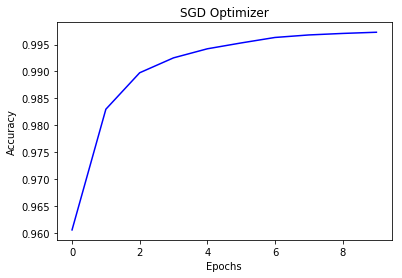

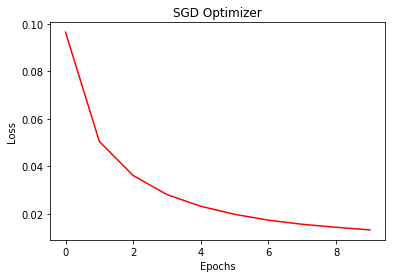

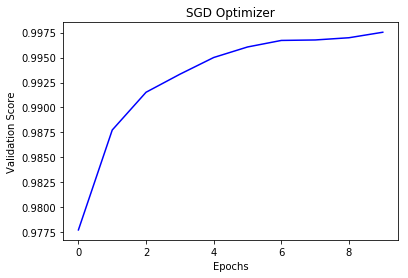

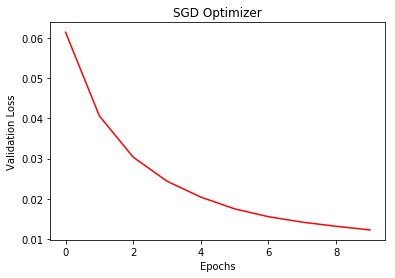

In [6]:
# Training SGD

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_training = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

print('Training Accuracy: %.4f' % model.evaluate(X_train, y_train, verbose = 0)[1])
print('Testing Accuracy: %.4f' % model.evaluate(X_test, y_test, verbose = 0)[1])

plt.plot(model_training.history['acc'], 'b')
plt.title('SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
_ = plt.show()

plt.plot(model_training.history['loss'], 'r')
plt.title('SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_ = plt.show()

plt.plot(model_training.history['val_acc'], 'b')
plt.title('SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
_ = plt.show()

plt.plot(model_training.history['val_loss'], 'r')
plt.title('SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
_ = plt.show()

In [10]:
# Analysis of SGD

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

y_pred = model.predict_classes(X_test, verbose = 0)
accuracy = accuracy_score(y_test_, y_pred)
precision = precision_score(y_test_, y_pred)
recall = recall_score(y_test_, y_pred)
f1 = f1_score(y_test_, y_pred)
auc = roc_auc_score(y_test_, y_pred)

print('SGD Test Analysis:\n')
print('Accuracy: %.4f' % (accuracy))
print('Precision: %.4f' % (precision))
print('Recall: %.4f' % (recall))
print('F1 score: %.4f' % (f1))
print('ROC AUC: %f\n' % auc)
print(classification_report(y_test_, y_pred))

SGD Test Analysis:

Accuracy: 0.9975
Precision: 0.9954
Recall: 0.9997
F1 score: 0.9975
ROC AUC: 0.997538

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       1.00      1.00      1.00     42648

   micro avg       1.00      1.00      1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [ ]:
# Training SGD(with call back)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_training = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [early_stopping_monitor])

print('Training Accuracy: %.4f' % model.evaluate(X_train, y_train, verbose = 0)[1])
print('Testing Accuracy: %.4f' % model.evaluate(X_test, y_test, verbose = 0)[1])

plt.plot(model_training.history['acc'], 'b')
plt.title('SGD Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
_ = plt.show()

plt.plot(model_training.history['loss'], 'r')
plt.title('SGD Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_ = plt.show()

plt.plot(model_training.history['val_acc'], 'b')
plt.title('SGD Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
_ = plt.show()

plt.plot(model_training.history['val_loss'], 'r')
plt.title('SGD Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
_ = plt.show()

y_probs = model.predict(X_test, verbose = 0)
y_classes = model.predict_classes(X_test, verbose = 0)

In [26]:
# Analysis of SGD(with call back)

y_pred = model.predict_classes(X_test, verbose = 0)
accuracy = accuracy_score(y_test_, y_pred)
precision = precision_score(y_test_, y_pred)
recall = recall_score(y_test_, y_pred)
f1 = f1_score(y_test_, y_pred)
auc = roc_auc_score(y_test_, y_pred)

print('SGD(with call back) Test Analysis:\n')
print('Accuracy: %.4f' % (accuracy))
print('Precision: %.4f' % (precision))
print('Recall: %.4f' % (recall))
print('F1 score: %.4f' % (f1))
print('ROC AUC: %f\n' % auc)
print(classification_report(y_test_, y_pred))

SGD(with call back) Test Analysis:

Accuracy: 0.6489
Precision: 0.5888
Recall: 0.9872
F1 score: 0.7377
ROC AUC: 0.648873

              precision    recall  f1-score   support

           0       0.96      0.31      0.47     42647
           1       0.59      0.99      0.74     42648

   micro avg       0.65      0.65      0.65     85295
   macro avg       0.77      0.65      0.60     85295
weighted avg       0.77      0.65      0.60     85295



In [ ]:
# Training Adam(with call back)

model_relu.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_training = model_relu.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [early_stopping_monitor])

print('Training Accuracy: %.4f' % model.evaluate(X_train, y_train, verbose = 0)[1])
print('Testing Accuracy: %.4f' % model.evaluate(X_test, y_test, verbose = 0)[1])

plt.plot(model_training.history['acc'], 'b')
plt.title('Adam Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
_ = plt.show()

plt.plot(model_training.history['loss'], 'r')
plt.title('Adam Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_ = plt.show()

plt.plot(model_training.history['val_acc'], 'b')
plt.title('Adam Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
_ = plt.show()
plt.plot(model_training.history['val_loss'], 'r')
plt.title('Adam Optimizer with Call Back')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
_ = plt.show()

In [ ]:
# Analysis of Adam(with call back)

y_pred = model.predict_classes(X_test, verbose = 0)
accuracy = accuracy_score(y_test_, y_pred)
precision = precision_score(y_test_, y_pred)
recall = recall_score(y_test_, y_pred)
f1 = f1_score(y_test_, y_pred)
auc = roc_auc_score(y_test_, y_pred)

print('Adam(with call back) Test Analysis:\n')
print('Accuracy: %.4f' % (accuracy))
print('Precision: %.4f' % (precision))
print('Recall: %.4f' % (recall))
print('F1 score: %.4f' % (f1))
print('ROC AUC: %f\n' % auc)
print(classification_report(y_test_, y_pred))